ทดลองใช้ feature ต่างๆ ของ [tltk](https://pypi.org/project/tltk/) ดู   ว่าได้ผลดีมากน้อยแค่ไหนแล้ว

## Import

In [ ]:
!pip install tltk

    100% |████████████████████████████████| 10.5MB 3.8MB/s 
    100% |████████████████████████████████| 757kB 20.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/12/7b/32/5dccd202a0896e39b2adf82252e7e508560ce64e0a6bdbec6a
Successfully built tltk


In [ ]:
!pip install sklearn-crfsuite

In [ ]:
!pip install gensim

In [ ]:
import re
from collections import Counter
from requests import get
from google.colab import files

In [ ]:
from tltk import nlp, corpus
import gensim

## Chunk
ตัดคำ, ประโยค(edu), PoS, NE รวบทั้งหมดในทีเดียว

In [ ]:
text = (
    "สำนักเขตจตุจักรชี้แจงว่า ได้นำป้ายประกาศเตือนปลิงไปปักตามแหล่งน้ำ ในเขตอำเภอเมือง "
    "จังหวัดอ่างทอง หลังจากนายสุกิจ อายุ 65 ปี ถูกปลิงกัดแล้วไม่ได้ไปพบแพทย์")

In [ ]:
nlp.chunk(text)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your

'<NEo>สำนัก/NOUN|เขต/NOUN|จตุจักร/PROPN|</NEo>ชี้แจง/VERB|ว่า/SCONJ|<s/>/SYM|ได้/AUX|นำ/VERB|ป้าย/NOUN|ประกาศ/VERB|เตือน/VERB|ปลิง/NOUN|ไป/VERB|ปัก/VERB|ตาม/ADP|แหล่ง/NOUN|น้ำ/NOUN|<u/>ใน/ADP|<NEl>เขต/NOUN|อำเภอ/NOUN|เมือง/NOUN|<s/>/SYM|จังหวัด/NOUN|อ่างทอง/PROPN|</NEl><u/>หลังจาก/SCONJ|<NEp>นาย/NOUN|สุ/PROPN|กิจ/NOUN|</NEp><s/>/SYM|อายุ/NOUN|<u/>65/X|<s/>/SYM|ปี/NOUN|<u/>ถูก/AUX|ปลิง/VERB|กัด/VERB|แล้ว/ADV|ไม่/PART|ได้/ADV|ไป/VERB|พบ/VERB|แพทย์/NOUN|<u/>'

In [ ]:
'<NEo>สำนัก/NOUN|เขต/NOUN|จตุจักร/PROPN|</NEo>'
'ชี้แจง/VERB|ว่า/SCONJ|<s/>/SYM|ได้/AUX|นำ/VERB|ป้าย/NOUN|ประกาศ/VERB|เตือน/VERB|ปลิง/NOUN|'
'ไป/VERB|ปัก/VERB|ตาม/ADP|แหล่ง/NOUN|น้ำ/NOUN|<u/>'
'ใน/ADP|<NEl>เขต/NOUN|อำเภอ/NOUN|เมือง/NOUN|<s/>/SYM|จังหวัด/NOUN|อ่างทอง/PROPN|</NEl><u/>'
'หลังจาก/SCONJ|<NEp>นาย/NOUN|สุ/PROPN|กิจ/NOUN|</NEp>'
'<s/>/SYM|อายุ/NOUN|<u/>65/X|<s/>/SYM|ปี/NOUN|<u/>'
'ถูก/AUX|ปลิง/VERB|กัด/VERB|แล้ว/ADV|ไม่/PART|ได้/ADV|ไป/VERB|พบ/VERB|แพทย์/NOUN|<u/>'

'ถูก/AUX|ปลิง/VERB|กัด/VERB|แล้ว/ADV|ไม่/PART|ได้/ADV|ไป/VERB|พบ/VERB|แพทย์/NOUN|<u/>'

สังเกตว่า &lt;NEo> กะ l, p จะคร่อมแบบไม่สวยเท่าไหร่

&lt;u/> ก็ยังมีผิดบ้าง

##NER
เติม B-O, I-O ให้กับ chunk ที่ทำ PoS มาแล้ว

In [ ]:
chunks = [('สำนัก', 'NOUN'), ('เขต', 'NOUN'), ('จตุจักร', 'PROPN'), ('ชี้แจง', 'VERB'), ('ว่า', 'SCONJ'), ('<s/>','PUNCT')]

In [ ]:
nlp.ner(chunks)  # O=Org, P=Person, L=Location

[('สำนัก', 'NOUN', 'B-O'),
 ('เขต', 'NOUN', 'I-O'),
 ('จตุจักร', 'PROPN', 'I-O'),
 ('ชี้แจง', 'VERB', 'O'),
 ('ว่า', 'SCONJ', 'O'),
 ('<s/>', 'PUNCT', 'O')]

ใช้ crf model ตาม [tutorial](http://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html) โดย train จาก corpus ขนาด 200,000 คำ ที่มี 7,354 entities

## PoS
ทำทั้ง segment และ PoS โดยใช้ Universal PoS tags

Default จะตัดคำด้วย word_segment(text, 'colloc') ก่อน แต่สามารถเลือกให้ option='mm' ก็ได้

ใช้ nltk.tag.perceptron มา train กับ บางส่วนของ TNC ที่ทำ pos-tag แล้ว (148,000 words)

In [ ]:
nlp.pos_tag('โปรแกรมสำหรับประมวลผลภาษาไทย วันนี้ใช้งานได้แล้ว')

[[('โปรแกรม', 'NOUN'),
  ('สำหรับ', 'ADP'),
  ('ประมวล', 'VERB'),
  ('ผล', 'NOUN'),
  ('ภาษา', 'NOUN'),
  ('ไทย', 'PROPN'),
  ('<s/>', 'PUNCT')],
 [('วันนี้', 'NOUN'),
  ('ใช้งาน', 'VERB'),
  ('ได้', 'ADV'),
  ('แล้ว', 'ADV'),
  ('<s/>', 'PUNCT')]]

In [ ]:
# หรือรับ wordlist ที่ตัดมาแล้วก็ได้
nlp.pos_tag_wordlist('โปรแกรม สำหรับ ประมวล ผล ภาษา ไทย'.split())

[('โปรแกรม', 'NOUN'),
 ('สำหรับ', 'ADP'),
 ('ประมวล', 'VERB'),
 ('ผล', 'NOUN'),
 ('ภาษา', 'NOUN'),
 ('ไทย', 'PROPN')]

### ดู tagger

In [ ]:
# อยากรู้ว่า ข้างใน มีเก็บข้อมูลอะไรไว้บ้าง
tg = nlp.tagger

In [ ]:
len(tg.tagdict)  # คำที่ใช้ lookup เอาเลย มี 611 คำ (ไม่นับ rare word)


611

In [ ]:
tg.classes

{'?',
 'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'INTJ',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'SYM',
 'VERB',
 'X'}

In [ ]:
w = tg.model.weights
len(w) # ข้อมูลสำคัญอยู่ตรงนี้

38158

In [ ]:
fts = list(w.keys())
fts[:20]  # ตัวอย่าง features

['bias',
 'i suffix สาว',
 'i pref1 น',
 'i-1 tag -START-',
 'i-2 tag -START2-',
 'i tag+i-2 tag -START- -START2-',
 'i word นางสาว',
 'i-1 tag+i word -START- นางสาว',
 'i-1 word -START2-',
 'i-1 suffix T2-',
 'i-2 word -START-',
 'i+1 word อรวรรยา',
 'i+1 suffix รยา',
 'i+2 word <sp/>',
 'i suffix รยา',
 'i pref1 อ',
 'i-1 tag X',
 'i-2 tag -START-',
 'i tag+i-2 tag X -START-',
 'i word อรวรรยา']

In [ ]:
# นับคำที่เอาไปใช้ใน features
cnt = Counter()
for ft in fts:
  word = ft.split()[-1]
  if re.fullmatch(r'[ก-๙]+', word): # ถ้าเป็นคำไทย
    cnt[word] += 1

print(len(cnt))
cnt.most_common(20)

8455


[('ที่', 27),
 ('ให้', 23),
 ('ถึง', 23),
 ('แล้ว', 23),
 ('ได้', 22),
 ('ทุก', 22),
 ('ไป', 22),
 ('ตาม', 22),
 ('ของ', 21),
 ('คือ', 21),
 ('มา', 21),
 ('แต่', 21),
 ('กับ', 21),
 ('ดี', 21),
 ('ทาง', 21),
 ('มาก', 21),
 ('ถูก', 20),
 ('เลย', 20),
 ('ทั้ง', 20),
 ('อีก', 20)]

## Segmentation

### segment

In [ ]:
# ตัดคำ และตัดประโยค (edu)
s = nlp.segment("แต่อาจเพราะนกกินปลีอกเหลืองเป็นพ่อแม่มือใหม่ รังที่ทำจึงไม่ค่อยแข็งแรง "
            "วันหนึ่งรังก็ฉีกเกือบขาดเป็นสองท่อนห้อยต่องแต่ง ผมพยายามหาอุปกรณ์มายึดรังกลับคืนรูปทรงเดิม "
            "ขณะที่แม่นกกินปลีอกเหลืองส่งเสียงโวยวายอยู่ใกล้ ๆ แต่สุดท้ายไม่สำเร็จ "
            "สองสามวันต่อมารังที่ช่วยซ่อมก็พังไป ไม่เห็นแม่นกบินกลับมาอีกเลย")
s.split('/>')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your

['แต่|อาจ|เพราะ|นกกินปลีอกเหลือง|เป็น|พ่อแม่|มือใหม่|<s',
 '|รัง|ที่|ทำ|จึง|ไม่ค่อย|แข็งแรง<u',
 'วัน|หนึ่ง|รัง|ก็|ฉีก|เกือบ|ขาด|เป็น|สอง|ท่อน|ห้อ|ยต่อง|แต่ง<u',
 'ผม|พยายาม|หา|อุปกรณ์|มา|ยึด|รัง|กลับคืน|รูปทรง|เดิม<u',
 'ขณะ|ที่|แม่|นกกินปลีอกเหลือง|ส่งเสียง|โวยวาย|อยู่|ใกล้|ๆ<u',
 'แต่|สุดท้าย|ไม่|สำเร็จ|<s',
 '|สอง|สาม|วัน|ต่อมา|รัง|ที่|ช่วย|ซ่อม|ก็|พัง|ไป<u',
 'ไม่|เห็น|แม่|นก|บิน|กลับ|มา|อีก|เลย<u',
 '']

### word_segment

In [ ]:
# ตัดคำอย่างเดียว
text = 'โปรแกรมสำหรับประมวลผลภาษาไทย'
nlp.word_segment(text)    # maximum collocation

'โปรแกรม|สำหรับ|ประมวลผล|ภาษาไทย|<s/>'

In [ ]:
# เลือก method ได้ 3 แบบ: colloc, mm, ngram
# กรณีใช้ ngram จะทำ spell check ได้ด้วย

nlp.word_segment('ผู้สือข่าวรายงานว่านายกรัฐนตรีไม่มาทำงานที่ทำเนียบรัฐบาล',
                 method='ngram', spellchk='yes')

'ผู้สื่อข่าว|รายงาน|ว่า|นายก|รัฐมนตรี|ไม่|มา|ทำงาน|ที่|ทำเนียบรัฐบาล|<s/>'

In [ ]:
# maximal matching
nlp.word_segment_mm(text)

'โปรแกรม|สำหรับ|ประมวลผล|ภาษาไทย|<s/>'

In [ ]:
# MM with N-best
nlp.word_segment_nbest('คนขับรถประจำทางหลวง',10)

[['คนขับรถ|ประจำ|ทางหลวง',
  'คนขับ|รถประจำทาง|หลวง',
  'คนขับรถ|ประจำทาง|หลวง',
  'คน|ขับรถ|ประจำ|ทางหลวง',
  'คนขับ|รถ|ประจำ|ทางหลวง',
  'คนขับรถ|ประ|จำ|ทางหลวง',
  'คน|ขับ|รถประจำทาง|หลวง',
  'คน|ขับรถ|ประจำทาง|หลวง',
  'คนขับ|รถ|ประจำทาง|หลวง',
  'คนขับรถ|ประจำ|ทาง|หลวง']]

### syllable & pronunciation

In [ ]:
# ตัดคำ, พยางค์, และได้เสียงอ่านด้วย
nlp.g2p("สถาบันอุดมศึกษาไม่สามารถก้าวให้ทันการเปลี่ยนแปลงของตลาดแรงงาน")

"สถา~บัน|อุ~ดม~ศึก~ษา|ไม่|สา~มารถ|ก้าว|ให้|ทัน|การ|เปลี่ยน~แปลง|ของ|ตลาด|แรง~งาน<tr/>sa1'thaa4~ban0|?u1~dom0~sUk1~saa4|maj2|saa4~maat2|kaaw2|haj2|than0|kaan0|pliian1~plxxN0|khOON4|ta1'laat1|rxxN0~Naan0|<s/>"

In [ ]:
# just syllable
nlp.syl_segment('โปรแกรมสำหรับประมวลผลภาษาไทย')

'โปร~แกรม~สำ~หรับ~ประ~มวล~ผล~ภา~ษา~ไทย~<s/>'

In [ ]:
# เสียงอ่าน เป็น IPA
nlp.th2ipa("ลงแม่น้ำรอเดินไปหาปลา")

'loŋ0|mɛɛ2~naam3|rᴐᴐ0|dəən0|paj0|haa4|plaa0|<s/>'

In [ ]:
# เสียงอ่าน แบบราชบัณฑิต ไม่มีสระสั้น-ยาว ไม่มีวรรณยุกต์
nlp.th2roman("คือเขาเดินเลยลงไปรอในแม่น้ำสะอาดไปหามะปราง")

'khue khaw doen loei long pai ro nai maenam sa-at pai ha maprang <s/>'

In [ ]:
# กรณีตัดคำได้หลายแบบ แสดงเสียงอ่านทุกแบบ  แต่อาจไม่เหมือน ipa
nlp.g2p_all("รอยกร่าง")

[('รอย~กร่าง', 'rᴐːj1.ka2.raːŋ2'),
 ('รอย~กร่าง', 'rᴐːj1.kraːŋ2'),
 ('รอ~ยก~ร่าง', 'rᴐː1.jok4.raːŋ3')]

## Spell check

In [ ]:
# คิดจาก edit distance (ตาม Norvig)
nlp.spell_candidates('รักษ')

['รัก', 'ทักษ', 'รักษา', 'รักษ์']

### Dict management

มีผลต่อการตัดคำ และ spellcheck
- nlp.reset_thaidict() : clear dictionary content setup.cfg
- nlp.read_thaidict(DictFile) : add a new dictionary e.g. nlp.read_thaidict('BEST.dict')
- nlp.check_thaidict(Word) : check whether Word exists in the dictionary

# Corpus

## Download

In [ ]:
!wget http://www.arts.chula.ac.th/ling/wp-content/uploads/tnc201705_3gram.zip

--2018-05-24 04:40:16--  http://www.arts.chula.ac.th/ling/wp-content/uploads/tnc201705_3gram.zip
Resolving www.arts.chula.ac.th (www.arts.chula.ac.th)... 161.200.48.9
Connecting to www.arts.chula.ac.th (www.arts.chula.ac.th)|161.200.48.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30896988 (29M) [application/zip]
Saving to: ‘tnc201705_3gram.zip’

tnc201705_3gram.zip 100%[===================>]  29.46M  8.60MB/s    in 3.4s    

2018-05-24 04:40:21 (8.60 MB/s) - ‘tnc201705_3gram.zip’ saved [30896988/30896988]



In [ ]:
!zipinfo tnc201705_3gram.zip

Archive:  tnc201705_3gram.zip
Zip file size: 30896988 bytes, number of entries: 3
-rw-r--r--  2.1 unx 151914848 bX defN 17-Jun-23 06:18 201705_3gram.txt
drwxrwxr-x  2.1 unx        0 bx stor 17-Aug-17 15:40 __MACOSX/
-rw-r--r--  2.1 unx      239 bX defN 17-Jun-23 06:18 __MACOSX/._201705_3gram.txt
3 files, 151915087 bytes uncompressed, 30896518 bytes compressed:  79.7%


In [ ]:
!unzip tnc201705_3gram.zip 201705_3gram.txt

Archive:  tnc201705_3gram.zip
  inflating: 201705_3gram.txt        


In [ ]:
# TNC.3g
!wget http://www.arts.chula.ac.th/ling/wp-content/uploads/TNC.3g.zip

--2018-10-16 08:32:55--  http://www.arts.chula.ac.th/ling/wp-content/uploads/TNC.3g.zip
Resolving www.arts.chula.ac.th (www.arts.chula.ac.th)... 161.200.48.9
Connecting to www.arts.chula.ac.th (www.arts.chula.ac.th)|161.200.48.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101809038 (97M) [application/zip]
Saving to: ‘TNC.3g.zip’

TNC.3g.zip          100%[===================>]  97.09M  10.4MB/s    in 11s     

2018-10-16 08:33:07 (8.67 MB/s) - ‘TNC.3g.zip’ saved [101809038/101809038]



In [ ]:
!unzip TNC.3g.zip TNC.3g

Archive:  TNC.3g.zip
  inflating: TNC.3g                  


## Load and query

In [ ]:
# corpus.trigram_load('201705_3gram.txt')
corpus.TNC_load()

1

In [ ]:
corpus.unigram('นก')   # frequency/million

141.86488203001073

In [ ]:
corpus.bigram('นก','บิน')

1.8751840024302384

In [ ]:
corpus.trigram('นก', 'บิน', 'ไป')

0.09616328217590966

In [ ]:
# corpus.collocates(w,STAT,DIR,SPAN,LIMIT,MINFQ)
### return all collocates of w, STAT = {freq,mi,chi2}
# DIR={left,right,both} SPAN={1,2}
# LIMIT is the number of top collocates
# MINFQ is the minimum raw frequency of bigram w-x or x-w.
# The output is a list of tuples ((w1,w2), stat)
corpus.collocates('นก', stat='freq', direct='right', span=2, limit=10, minfq=5)

[(('นก', '<s>'), 21.059758796524218),
 (('นก', 'เงือก'), 7.981552420600503),
 (('นก', 'ปากห่าง'), 3.8946129281243413),
 (('นก', 'ที่'), 2.9089392858212673),
 (('นก', 'นี้'), 2.3560004133097867),
 (('นก', 'อินทรี'), 2.259837131133877),
 (('นก', 'ตัว'), 2.13963302841399),
 (('นก', 'บิน'), 2.091551387326035),
 (('นก', 'เป็น'), 1.9713472846061482),
 (('นก', 'กระเรียน'), 1.9473064640621707)]

## Word Vector

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin

### Follow example

In [ ]:
corpus.w2v_load()

1

In [ ]:
# มีคำนี้อยู่ไหม
corpus.w2v_exist('อาหาร')

True

In [ ]:
# แปลงเป็น vector
corpus.w2v('อาหาร')

array([ 4.3417077e+00,  2.7017918e+00,  2.4149504e+00, -1.3729613e+00,
        1.2849796e+00, -3.1696767e-01,  1.6111651e-01, -8.4592506e-02,
       -1.3102694e+00,  2.1613088e+00, -4.5822494e-02,  9.2299187e-01,
        4.8927337e-01, -2.7081797e+00, -1.5683790e+00, -3.5793822e+00,
        1.1854382e+00,  1.2072237e+00, -2.8199282e+00,  8.1384224e-01,
       -9.5724291e-01, -8.4144580e-01,  3.6350479e-03, -1.4165610e+00,
       -1.3814044e+00, -1.5249868e-01, -7.6264876e-01,  1.1604714e+00,
       -1.7034299e+00,  7.1920228e-01, -7.7075046e-01,  1.6867928e-01,
        7.8255266e-01,  1.4846981e-01, -4.5913595e-01,  1.5470924e+00,
        1.2224985e+00, -3.0264008e-01,  1.4823226e+00, -3.9652774e+00,
        4.1482028e-01, -2.5117238e+00, -3.3764346e+00,  1.6185311e+00,
       -3.0816844e-01,  6.2843096e-01,  1.4276540e+00, -2.1361227e+00,
       -1.6863720e+00, -4.9999332e-01, -2.9121704e+00, -1.1751316e+00,
        1.3813881e+00, -6.7971396e-01, -4.7005069e-01,  7.0379263e-01,
      

In [ ]:
# เปรียบเทียบคำ
corpus.similarity("อาหาร","อาหารว่าง")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.7835518

In [ ]:
# คำอื่นที่ใกล้เคียง
corpus.similar_words("อาหาร", n=5, score="y")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('อาหารว่าง', 0.7835519313812256),
 ('ของว่าง', 0.7366501092910767),
 ('ของหวาน', 0.703102707862854),
 ('เนื้อสัตว์', 0.6960341930389404),
 ('ผลไม้', 0.6641998291015625)]

In [ ]:
corpus.outofgroup(["น้ำ","อาหาร","ข้าว","รถยนต์","ผัก"])

'รถยนต์'

In [ ]:
corpus.analogy("ผู้ชาย","พ่อ", "แม่", n=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ผู้หญิง', 0.8345998525619507)]

### plot

In [ ]:
# ต้องลง font 'TH Sarabun New' ก่อน
import matplotlib

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

matplotlib.font_manager._rebuild()

--2018-10-16 08:38:43--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2018-10-16 08:38:43--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2018-10-16 08:38:43 (

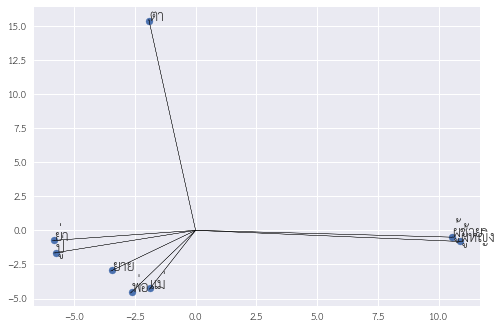

1

In [ ]:
words = "ผู้ชาย พ่อ แม่ ผู้หญิง ปู่ ย่า ตา ยาย".split()
corpus.w2v_plot(words)  # ตา มี 2 ความหมาย

### Deeper

In [ ]:
model = corpus.w2v_model
model

In [ ]:
wv = model.wv   # newer interface us wv instead of just model

In [ ]:
vocab = wv.vocab  # a dict
print(len(vocab))
'อาหาร' in vocab

31078


True

In [ ]:
wordlist = wv.index2word
wordlist[:10]

['ที่', 'การ', 'เป็น', 'ใน', 'ของ', 'มี', 'จะ', 'และ', 'ไม่', 'ได้']

In [ ]:
wv.similarity('อาหาร','อาหารว่าง')

0.7835518775463033

In [ ]:
wv.most_similar('อาหาร')

[('อาหารว่าง', 0.7835519313812256),
 ('ของว่าง', 0.7366501092910767),
 ('ของหวาน', 0.703102707862854),
 ('เนื้อสัตว์', 0.6960341930389404),
 ('ผลไม้', 0.6641998291015625),
 ('เครื่องดื่ม', 0.6563372611999512),
 ('กาแฟ', 0.6466985940933228),
 ('กับข้าว', 0.641933798789978),
 ('ข้าวกล้อง', 0.6367597579956055),
 ('ผัก', 0.6347238421440125)]

In [ ]:
wv.doesnt_match(["น้ำ","อาหาร","ข้าว","รถยนต์","ผัก"])

'รถยนต์'

### Projector

In [ ]:
# export เพื่อแสดงบน Embedding Projector
ft = open('tensor.tsv', 'w')
fm = open('metadata.tsv', 'w')

In [ ]:
len(wv.index2word) # a list

31078

In [ ]:
wv.index2word[:10]

['ที่', 'การ', 'เป็น', 'ใน', 'ของ', 'มี', 'จะ', 'และ', 'ไม่', 'ได้']

In [ ]:
len(wv['ที่'])   # vector dimension แค่ 100 เอง

100

In [ ]:
# ย่อจาก https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/scripts/word2vec2tensor.py

for word in wv.index2word:
  fm.write(word + '\n')  # a word on each line
  vector_row = '\t'.join('%.3f' % x for x in wv[word])
  ft.write(vector_row + '\n')

In [ ]:
fm.close()
ft.close()

In [ ]:
files.download('tensor.tsv')

In [ ]:
files.download('metadata.tsv')

Upload ไปไว้บน AWS และ Gist แล้วทำ [Link ไป Projector](http://projector.tensorflow.org/?config=https://raw.githubusercontent.com/korakot/65cb9068842e6765bc29a052e55ec8fa/raw/fc960878dd0868612c4a40f4c8450f79ac8e5340/config.json)

# Footnote

## Segmentation
Word segmentation is based on a maximum collocation approach described in this publication:
"Aroonmanakun, W. 2002. [Collocation and Thai Word Segmentation](http://pioneer.chula.ac.th/~awirote/ling/SNLP2002-0051c.pdf). In Thanaruk Theeramunkong and Virach Sornlertlamvanich, eds. Proceedings of the Fifth Symposium on Natural Language Processing & The Fifth Oriental COCOSDA Workshop. Pathumthani: Sirindhorn International Institute of Technology. 68-75."

## Syllable
Use tltk.nlp.word_segment(Text) or tltk.nlp.syl_segment(Text) for segmenting Thai texts. Syllable segmentation now is based on a trigram model trainned on 3.1 million syllable corpus. Input text is a paragraph of Thai texts which can be mixed with English texts. Spaces in the paragraph will be marked as "&lt;s/>". Word boundary is marked by "|". Syllable boundary is marked by "~". Syllables here are written syllables. One written syllable may be pronounced as two syllables, i.e. "สกัด" is segemnted here as one written syllable, but it is pronounced as two syllables "sa1-kat1".

## Dictionary
Determining words in a sentence is based on the dictionary and maximum collocation strength between syllables. Since many compounds and idioms, e.g. 'เตาไมโครเวฟ', 'ไฟฟ้ากระแสสลับ', 'ปีงบประมาณ', 'อุโมงค์ใต้ดิน', 'อาหารจานด่วน', 'ปูนขาวผสมพิเศษ', 'เต้นแร้งเต้นกา' etc., are included in the standard dictionary, these will likely be segmented as one word. For applications that prefer smallest meaningful words (i.e. 'รถ','โดยสาร' as segmented in BEST corpus), users should reset the default dictionary used in this package and reload a new dictionary containing only simple words or smallest meaningful words. Use "reset_thaidict()" to clear default dictionary content, and "read_thaidict('DICT_FIILE')" to load a new dictionary. A list of words compiled from BEST corpus is included in this package as a file 'BEST.dict'

## Proper names
The standard dictionary used in this package has more then 40,000 entries including abbreviations and transliterations compiled from various sources. A dictionary of 8,700 proper names e.g. country names, organization names, location names, animal names, plant names, food names, ..., such as 'อุซเบกิสถาน', 'สำนักเลขาธิการนายกรัฐมนตรี', 'วัดใหญ่สุวรรณาราม', 'หนอนเจาะลำต้นข้าวโพด', 'ปลาหมึกกระเทียมพริกไทย', are also added as a list of words in the system.

## Specialized Dict
For segmenting a specific domain text, a specialized dicionary can be used by adding more dictionary before segmenting texts. This can be done by calling read_thaidict("SPECIALIZED_DICT"). Please note that the dictionary is a text file in "iso-8859-11" encoding. The format is one word per one line.

## Discourse Units
'setence segment' or actually 'edu segment' is a process to break a paragraph into a chunk of discourse units, which usually are a clause. It is based on RandomForestClassifier model, which is trained on an edu-segmented corpus (approx. 7,000 edus) created and used in [Nalinee's thesis](http://www.arts.chula.ac.th/~ling/thesis/2556MA-LING-Nalinee.pdf). Accuracy of the model is 97.8%.
The reason behind using edu can be found in
- Aroonmanakun, W. 2007. Thoughts on Word and Sentence Segmentation in Thai. In Proceedings of the Seventh Symposium on Natural Language Processing, Dec 13-15, 2007, Pattaya, Thailand. 85-90.
- Intasaw, N. and Aroonmanakun, W. 2013. Basic Principles for Segmenting Thai EDUs. in Proceedings of 27th Pacific Asia Conference on Language, Information, and Computation, pages 491-498, Nov 22-24, 2013, Taipei.

## Romanization
'grapheme to phoneme' (g2p), as well as IPA transcription (th2ipa) and Thai romanization (th2roman) is based on the hybrid approach presented in the paper "A Unified Model of Thai Romanization and Word Segmentation". The Thai Royal Institute guidline for Thai romanization gcan be [downloaded](http://www.arts.chula.ac.th/~ling/tts/ThaiRoman.pdf).
- Aroonmanakun, W., and W. Rivepiboon. 2004. [A Unified Model of Thai Word Segmentation and Romanization](http://www.aclweb.org/anthology/Y04-1021). In Proceedings of The 18th Pacific Asia Conference on Language, Information and Computation, Dec 8-10, 2004, Tokyo, Japan. 205-214.

## อื่นๆ
- Module "spell_candidates" is modified from Peter Norvig's [Python codes](http://norvig.com/spell-correct.html)
- BEST corpus is the corpus [released by NECTEC](https://www.nectec.or.th/corpus/)
- Universal POS tags are used in this project. For more information, please see [Universal Dependencies](http://universaldependencies.org/u/pos/index.html)
- pos_tag is based on PerceptronTagger in nltk.tag.perceptron. It is trained with TNC data manually pos-taged (approx. 148,000 words). Accuracy on pos tagging is 91.68%. NLTK PerceptronTagger is a port of the Textblob [Averaged Perceptron Tagger](https://explosion.ai/blog/part-of-speech-pos-tagger-in-python)
- named entiy recognition module is a CRF model adapted from [this tutorial](http://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html). The model is trained with NER data used in [Sasimimon's](http://pioneer.chula.ac.th/~awirote/Data-Sasiwimon.zip) and [Nutcha's](http://pioneer.chula.ac.th/~awirote/Data-Nutcha.zip) theses (altogether 7,354 names in a corpus of 183,300 words).  Accuracy of the model is 92%

# Next
- ลอง collocates แบบต่างๆ ดู
- query จาก source ของ TNC โดยตรง